# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [ ]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2024-02-18 21:54:49--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.1’

test.dat.1          100%[===================>]   2.78K  --.-KB/s    in 0s      

2024-02-18 21:54:49 (187 MB/s) - ‘test.dat.1’ saved [2844/2844]

--2024-02-18 21:54:49--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.1’

train.dat.1         100%[===================>]  10.98K  --.-KB/s    in 0s      

2024-02-18 21:54:49 (155 MB/s) - ‘train.dat.1’ saved [11244/11244]



In [ ]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [ ]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    result = 0
    for i in range(len(array1)):
        result += array1[i] * array2[i]
    return result



def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
     in_value = dot_product(weight, instance[:-1])
     return sigmoid(in_value)

# Predict the label of an instance; this is the defi3nition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Initialize weights with zeros
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Compute the weighted sum of inputs
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            # Update weights using gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




Ans: In the `train_perceptron` function, we calculate the `output` using the sigmoid function directly from the weighted sum (`in_value`). This approach is consistent with the standard training procedure for a perceptron, where the output is computed using the sigmoid function applied to the dot product of weights and inputs.

Introducing the `predict` function here would be redundant and less efficient because `predict` internally computes the `output` using the sigmoid function applied to the dot product as well. Therefore, directly calculating the `output` using the `sigmoid` function on the dot product (`in_value`) avoids unnecessary computations and simplifies the code.

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]      # number of epochs
lr_array = [0.005, 0.01, 0.05]         # learning rate

for lr in lr_array:
    for tr_size in tr_percent:
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            print(f"# tr: {len(pre_instances)}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")


# tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr: 100, epo

In [ ]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 74.0
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 78.0
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 77.0
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 20, epochs: 100

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



A. It's unnecessary to use the entire training dataset to achieve the highest accuracy with the test dataset. The experiment results indicate that the accuracy is influenced differently by the training dataset size (`tr`) for different combinations of epochs and learning rates. In general, increasing the size of the training dataset leads to higher accuracy, but there may be a point of diminishing returns. This suggests that if the hyperparameters are well-tuned, the model can achieve high accuracy even with a smaller portion of the training data.

B. If the accuracy of the model decreases when more training data is used, it could be due to overfitting. When the training dataset is larger (`tr`), the model becomes more complex and may start to overfit the training data if the number of epochs and learning rate remains the same. Overfitting refers to the situation where the model learns to fit the noise or specific patterns in the training data that do not generalize well to unseen data, resulting in reduced performance on the test dataset.

C.It may be difficult to achieve an accuracy higher than 80.0% using only the provided hyperparameters. Based on the results, the accuracy falls between 70-80% for various hyperparameter combinations. To achieve a higher accuracy, additional tuning of hyperparameters like regularization strength, model architecture, or feature engineering may be required.

D. It's not always a good idea to train a model for more epochs while keeping all other hyperparameters fixed. This is because increasing the number of epochs can lead to overfitting, especially if the model is already complex or if the training dataset is small. While it's true that accuracy generally improves with more epochs, there is a point where further training may not significantly improve performance on the test dataset. Therefore, it's important to monitor the model's performance on a validation dataset and consider early stopping techniques to prevent overfitting and optimize training time.

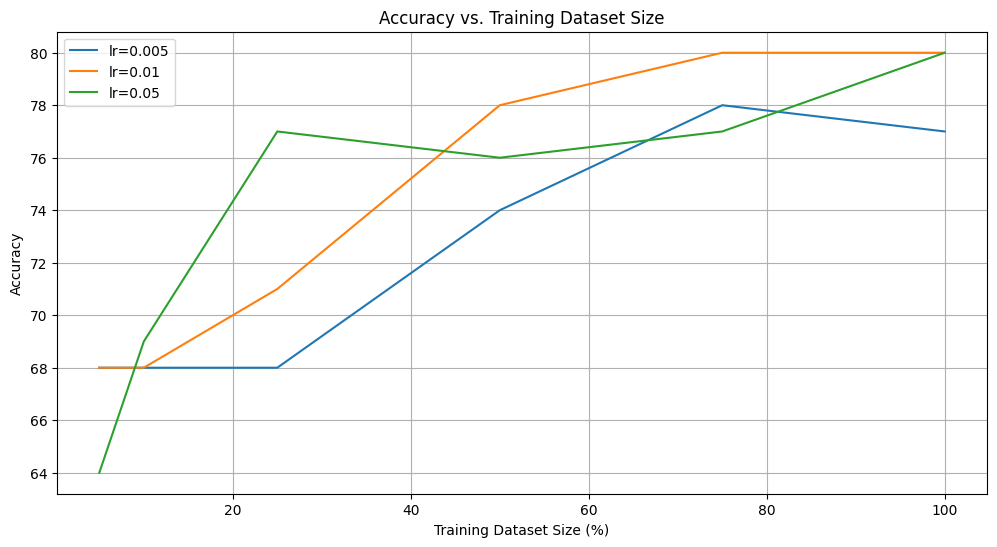

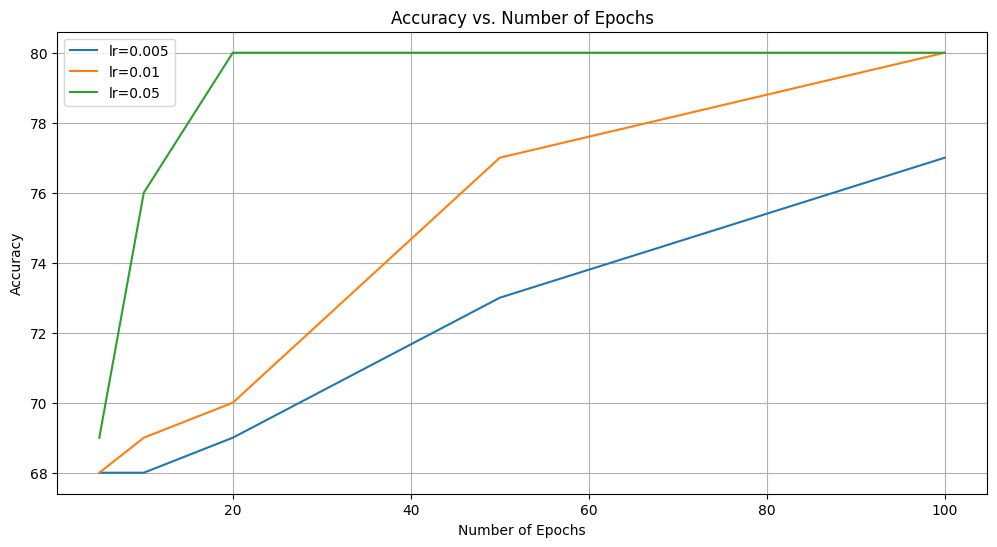

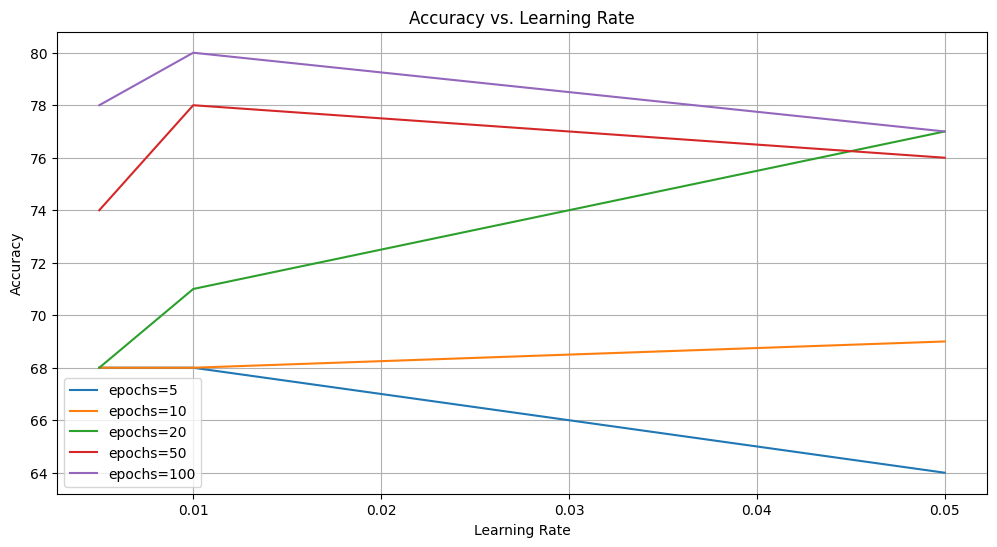

In [ ]:
import matplotlib.pyplot as plt

# Define hyperparameters
tr_percent = [5, 10, 25, 50, 75, 100]
num_epochs = [5, 10, 20, 50, 100]
lr_array = [0.005, 0.01, 0.05]

# Initialize empty lists to store results
accuracies_tr = []
accuracies_epochs = []
accuracies_lr = []

# Calculate accuracies for different hyperparameter combinations
for lr in lr_array:
    accuracy_lr = []
    for tr_size in tr_percent:
        accuracy_tr = []
        for epochs in num_epochs:
            size = round(len(instances_tr) * tr_size / 100)
            pre_instances = instances_tr[0:size]
            weights = train_perceptron(pre_instances, lr, epochs)
            accuracy = get_accuracy(weights, instances_te)
            accuracy_tr.append(accuracy)
        accuracy_lr.append(accuracy_tr)
    accuracies_lr.append(accuracy_lr)

# Plot accuracy vs. training dataset size
plt.figure(figsize=(12, 6))
for i, lr in enumerate(lr_array):
    plt.plot(tr_percent, [accuracies_lr[i][j][-1] for j in range(len(tr_percent))], label=f"lr={lr}")
plt.title("Accuracy vs. Training Dataset Size")
plt.xlabel("Training Dataset Size (%)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy vs. number of epochs
plt.figure(figsize=(12, 6))
for i, lr in enumerate(lr_array):
    plt.plot(num_epochs, [accuracies_lr[i][-1][j] for j in range(len(num_epochs))], label=f"lr={lr}")
plt.title("Accuracy vs. Number of Epochs")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy vs. learning rate
plt.figure(figsize=(12, 6))
for i, epochs in enumerate(num_epochs):
    plt.plot(lr_array, [accuracies_lr[j][i][-1] for j in range(len(lr_array))], label=f"epochs={epochs}")
plt.title("Accuracy vs. Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()